<a href="https://colab.research.google.com/github/drashtipatel19/ALY6110/blob/main/Drashti_m4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5\r\n7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5\r\n11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5\r\n7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5\r\n7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7\r\n7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5\r\n7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5\r\n8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,5\r\n8.9,0.62,0.1

In [4]:
df = spark.read.csv("winequality-red.csv", inferSchema=True, header = True)
df.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



In [5]:
df.describe().show()

+-------+------------------+------------------+-------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+-------------------+------------------+------------------+
|summary|     fixed acidity|  volatile acidity|        citric acid|    residual sugar|           chlorides|free sulfur dioxide|total sulfur dioxide|             density|                 pH|          sulphates|           alcohol|           quality|
+-------+------------------+------------------+-------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+-------------------+------------------+------------------+
|  count|              1596|              1596|               1596|              1596|                1596|               1596|                1596|                1596|               1596|               1596|              1596|              1596|
|   mean

In [6]:
#checking for NA Values
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+---+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density| pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+---+---------+-------+-------+
|            0|               0|          0|             0|        0|                  0|                   0|      0|  0|        0|      0|      0|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+---+---------+-------+-------+



In [7]:
#changing the column names
newColumns = ["fixed_acidity", "volatile_acidity","citric_acid","residual_sugar","chlorides", "free_sulfur_dioxide","total_sulfur_dioxide",'density','pH','sulphates','alcohol','quality']
df = df.toDF(*newColumns)

In [8]:
##Eda
pandasDF = df.toPandas()
pandasDF

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


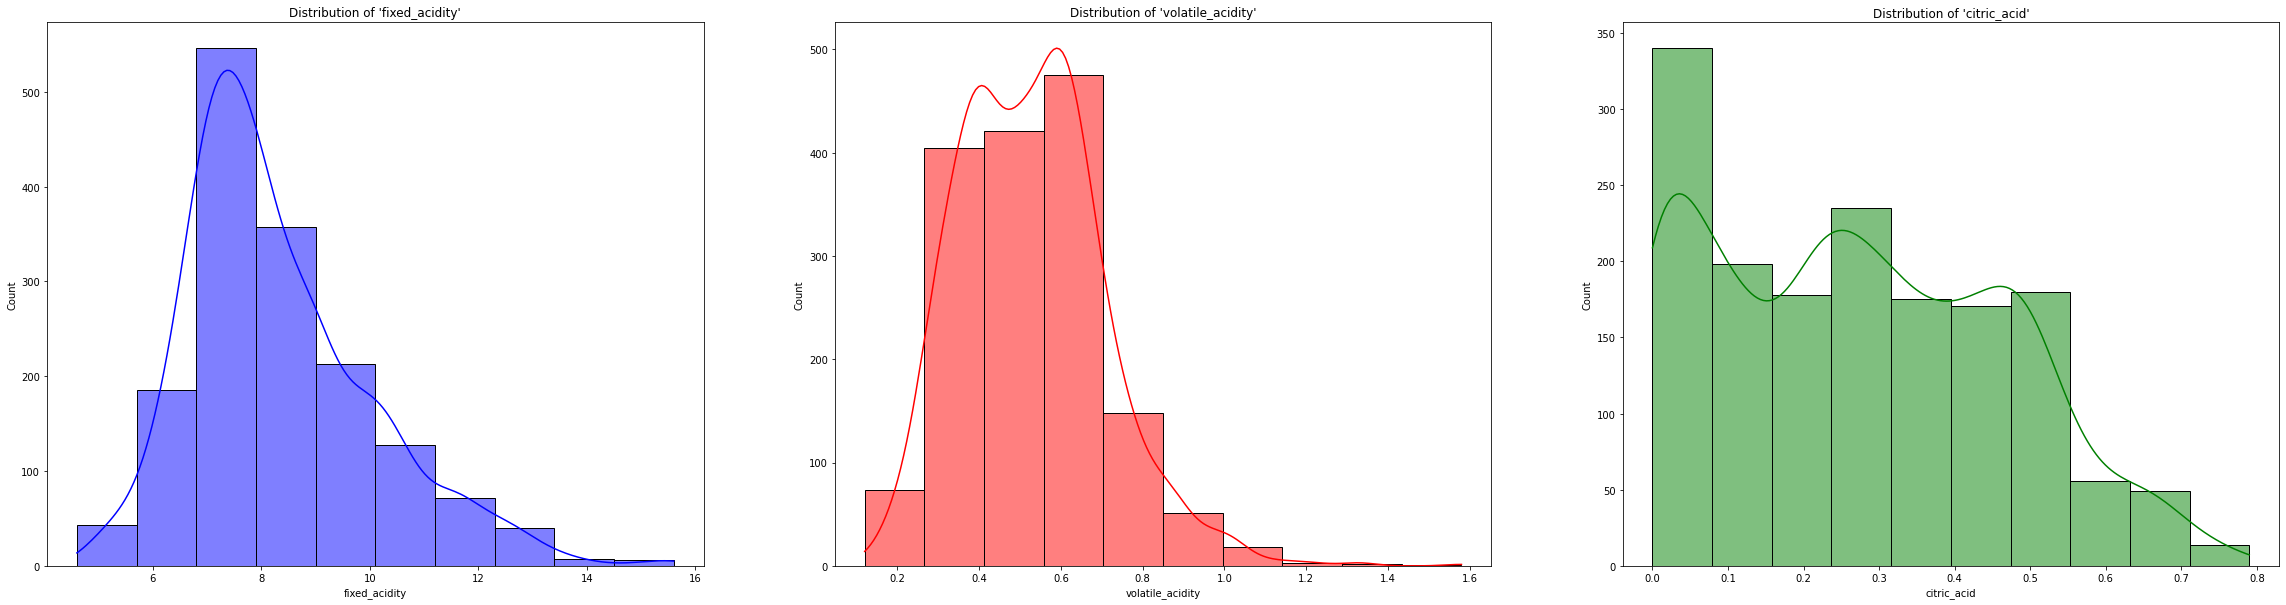

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(40, 10))
sns.histplot(ax = axes[0], x = pandasDF["fixed_acidity"],bins = 10, kde = True,color = "b").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = pandasDF["volatile_acidity"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'volatile_acidity'");
sns.histplot(ax = axes[2], x = pandasDF["citric_acid"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'citric_acid'");

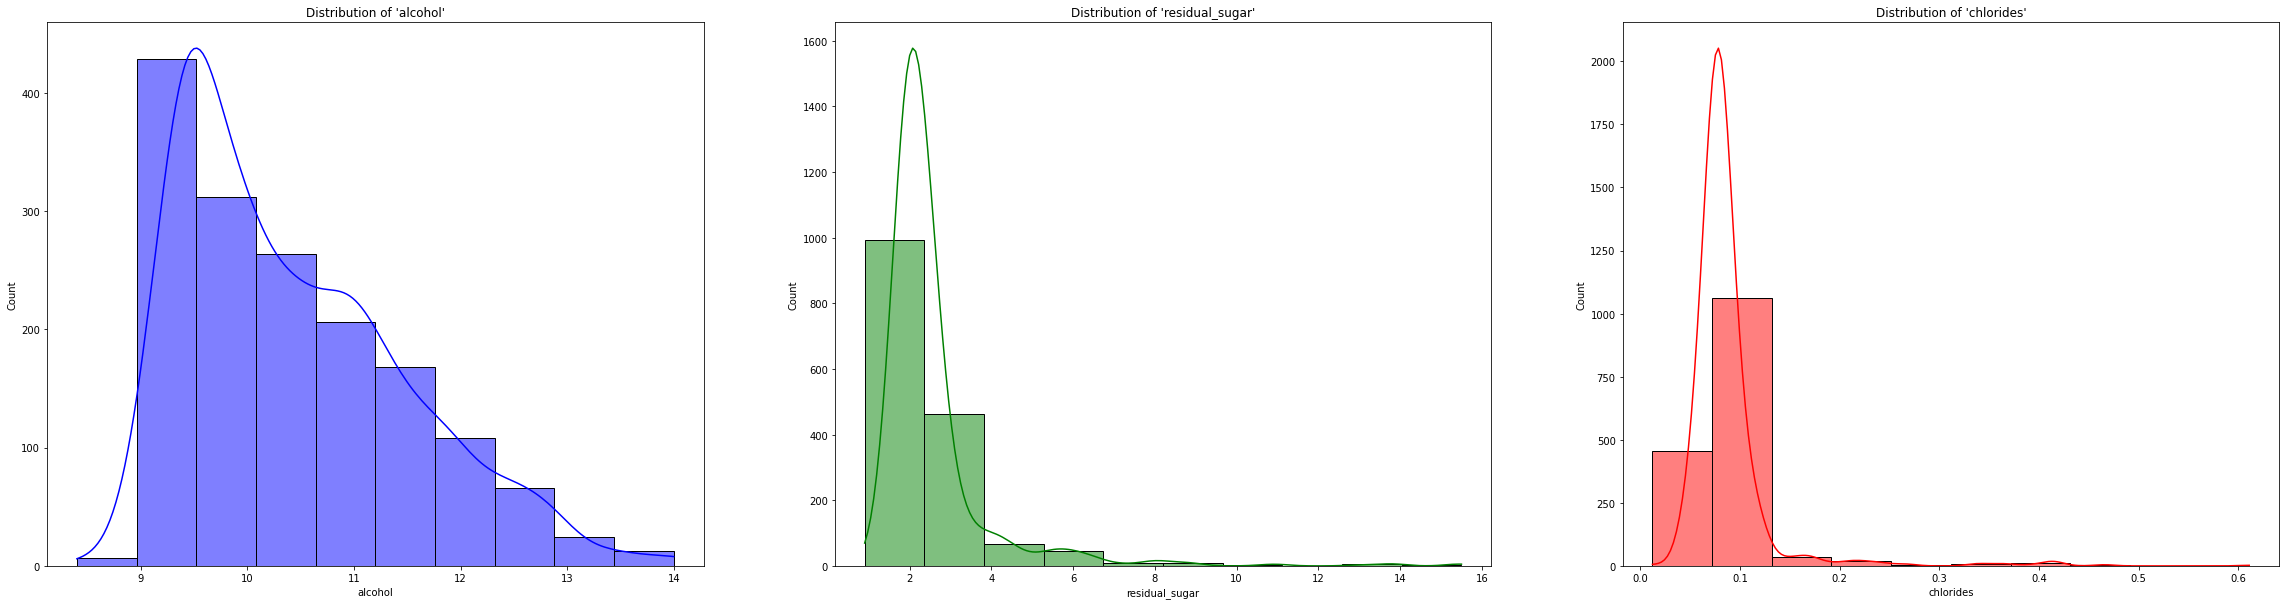

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = pandasDF["alcohol"],
             bins = 10,
             kde = True,
             color = "b").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = pandasDF["residual_sugar"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'residual_sugar'");

sns.histplot(ax = axes[2], x = pandasDF["chlorides"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'chlorides'");

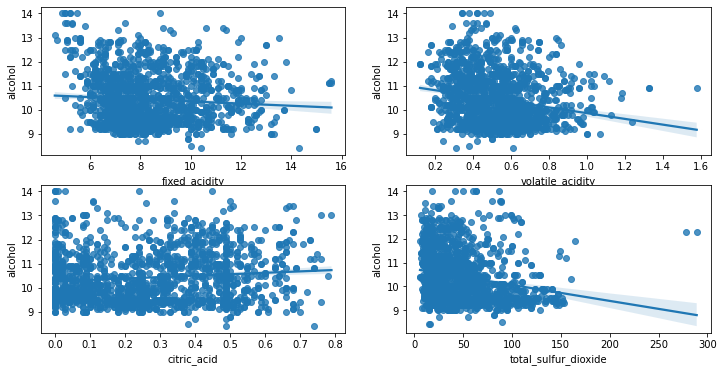

In [11]:

#Reg plot 
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "fixed_acidity", y = "alcohol", data = pandasDF);
sns.regplot(ax = axes[1], x = "volatile_acidity", y = "alcohol", data = pandasDF);
sns.regplot(ax = axes[2], x = "citric_acid", y = "alcohol", data = pandasDF);
sns.regplot(ax = axes[3], x = "total_sulfur_dioxide", y = "alcohol", data = pandasDF);

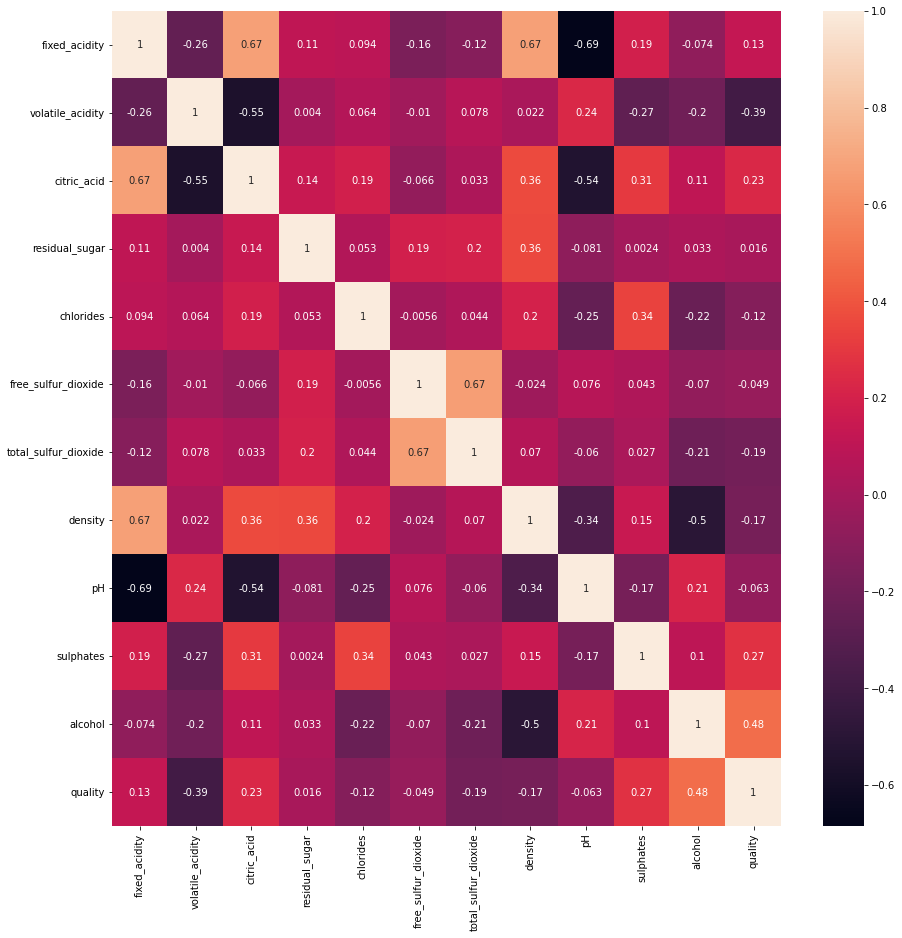

In [12]:
plt.figure(figsize = [15, 15], facecolor = 'white')
sns.heatmap(pandasDF.corr(), annot=True);
     

In [13]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
only_features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']

In [16]:
assembler = VectorAssembler(inputCols=only_features, outputCol= 'features')
feat_df = assembler.transform(df).select('features')
feat_df.show(5)

+--------------------+
|            features|
+--------------------+
|[7.4,0.7,0.0,1.9,...|
|[7.8,0.88,0.0,2.6...|
|[7.8,0.76,0.04,2....|
|[11.2,0.28,0.56,1...|
|[7.4,0.7,0.0,1.9,...|
+--------------------+
only showing top 5 rows



In [17]:

#standadize the data 

scaler = StandardScaler(
    inputCol = 'features',
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True,
).fit(feat_df)

#when we transform the dataset feature will still remain in it
df_scaled = scaler.transform(feat_df)
df_scaled.show(10)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[7.4,0.7,0.0,1.9,...|[-0.5277444346205...|
|[7.8,0.88,0.0,2.6...|[-0.2968245942766...|
|[7.8,0.76,0.04,2....|[-0.2968245942766...|
|[11.2,0.28,0.56,1...|[1.66599404864650...|
|[7.4,0.7,0.0,1.9,...|[-0.5277444346205...|
|[7.4,0.66,0.0,1.8...|[-0.5277444346205...|
|[7.9,0.6,0.06,1.6...|[-0.2390946341906...|
|[7.3,0.65,0.0,1.2...|[-0.5854743947065...|
|[7.8,0.58,0.02,2....|[-0.2968245942766...|
|[7.5,0.5,0.36,6.1...|[-0.4700144745345...|
+--------------------+--------------------+
only showing top 10 rows



In [18]:

#fit PCA model
n_components = 2
pca = PCA(
    k= n_components,
    inputCol = 'scaledFeatures',
    outputCol = 'pcaFeatures'
).fit(df_scaled)

df_pca = pca.transform(df_scaled)
print("explained variance ratio", pca.explainedVariance.toArray())
df_pca.show(10)

explained variance ratio [0.30832674 0.16891527]
+--------------------+--------------------+--------------------+
|            features|      scaledFeatures|         pcaFeatures|
+--------------------+--------------------+--------------------+
|[7.4,0.7,0.0,1.9,...|[-0.5277444346205...|[1.59970336186691...|
|[7.8,0.88,0.0,2.6...|[-0.2968245942766...|[0.82575667375355...|
|[7.8,0.76,0.04,2....|[-0.2968245942766...|[0.74835586865271...|
|[11.2,0.28,0.56,1...|[1.66599404864650...|[-2.3884918448532...|
|[7.4,0.7,0.0,1.9,...|[-0.5277444346205...|[1.59970336186691...|
|[7.4,0.66,0.0,1.8...|[-0.5277444346205...|[1.56978174552177...|
|[7.9,0.6,0.06,1.6...|[-0.2390946341906...|[1.09682691831888...|
|[7.3,0.65,0.0,1.2...|[-0.5854743947065...|[2.22422593706579...|
|[7.8,0.58,0.02,2....|[-0.2968245942766...|[1.04792012991864...|
|[7.5,0.5,0.36,6.1...|[-0.4700144745345...|[-0.6072440251223...|
+--------------------+--------------------+--------------------+
only showing top 10 rows



In [19]:
#collect data in Numpy Array
import numpy as np
x_pca = df_pca.rdd.map(lambda row: row.pcaFeatures).collect()
x_pca = np.array(x_pca)
x_pca
     

array([[ 1.59970336, -1.61802861],
       [ 0.82575667, -1.88732246],
       [ 0.74835587, -1.40588348],
       ...,
       [ 1.47370119,  0.49426762],
       [ 2.29798266, -0.31409117],
       [ 0.42959302,  1.47137549]])

In [20]:

#convert array to dataframe 
import pandas as pd
df_pca = pd.DataFrame(x_pca, columns= ['PC1','PC2'])
df_pca.head()
     

,PC1,PC2
0,1.599703,-1.618029
1,0.825757,-1.887322
2,0.748356,-1.405883
3,-2.388492,0.498648
4,1.599703,-1.618029


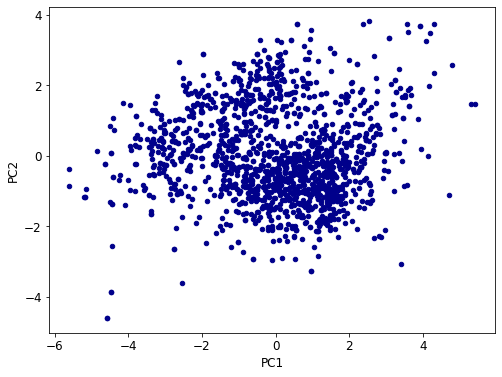

In [21]:

#plot two principal components 
plt.rcParams['figure.figsize'] = 8,6
plt.rcParams['font.size']= 12
ax1 = df_pca.plot.scatter(x='PC1', y='PC2', c='DarkBlue')

In [22]:

#linear regression using Pyspark
output = assembler.transform(df)

#input vs output 
finalized_data = output.select("features","quality")
finalized_data.show()
     

+--------------------+-------+
|            features|quality|
+--------------------+-------+
|[7.4,0.7,0.0,1.9,...|      5|
|[7.8,0.88,0.0,2.6...|      5|
|[7.8,0.76,0.04,2....|      5|
|[11.2,0.28,0.56,1...|      6|
|[7.4,0.7,0.0,1.9,...|      5|
|[7.4,0.66,0.0,1.8...|      5|
|[7.9,0.6,0.06,1.6...|      5|
|[7.3,0.65,0.0,1.2...|      7|
|[7.8,0.58,0.02,2....|      7|
|[7.5,0.5,0.36,6.1...|      5|
|[6.7,0.58,0.08,1....|      5|
|[7.5,0.5,0.36,6.1...|      5|
|[5.6,0.615,0.0,1....|      5|
|[7.8,0.61,0.29,1....|      5|
|[8.9,0.62,0.18,3....|      5|
|[8.9,0.62,0.19,3....|      5|
|[8.5,0.28,0.56,1....|      7|
|[8.1,0.56,0.28,1....|      5|
|[7.4,0.59,0.08,4....|      4|
|[7.9,0.32,0.51,1....|      6|
+--------------------+-------+
only showing top 20 rows



In [23]:
#split the train and test data
train_data,test_data = finalized_data.randomSplit([0.7,0.3])

In [24]:
#train model
regressor = LinearRegression(featuresCol= 'features', labelCol= 'quality')

regressor = regressor.fit(train_data)

In [25]:

#print model co-efficient and intercept
coeff = regressor.coefficients

intr = regressor.intercept

print("The coeeficient of the model is : %a" %coeff)
print("The intercept of the model is : %a" %intr)
     

The coeeficient of the model is : DenseVector([0.056, -1.0572, -0.264, 0.0309, -1.4453, -0.0039, -35.2801, -0.1733, 0.9557, 0.2964])
The intercept of the model is : 37.94475905790524


In [26]:

#evaluate the model
pred = regressor.evaluate(test_data)
#predict the model
pred.predictions.show()
     

+--------------------+-------+------------------+
|            features|quality|        prediction|
+--------------------+-------+------------------+
|[4.7,0.6,0.17,2.3...|      6| 6.139656104121734|
|[5.0,0.4,0.5,4.3,...|      6| 6.746601573666748|
|[5.1,0.42,0.0,1.8...|      7| 6.816824822353272|
|[5.1,0.47,0.02,1....|      6|  6.35863996747792|
|[5.2,0.32,0.25,1....|      5| 5.226305832737765|
|[5.2,0.48,0.04,1....|      7| 6.188265860460568|
|[5.2,0.645,0.0,2....|      6| 5.995613575986049|
|[5.3,0.57,0.01,1....|      7| 6.433016125026647|
|[5.4,0.58,0.08,1....|      6| 5.439137855895666|
|[5.4,0.74,0.09,1....|      6| 5.571194975597429|
|[5.6,0.31,0.78,13...|      6| 5.775256014925645|
|[5.6,0.5,0.09,2.3...|      5|6.4086515022715425|
|[5.6,0.66,0.0,2.2...|      7| 6.183301469314834|
|[5.6,0.66,0.0,2.5...|      5| 6.265302782029394|
|[5.6,0.85,0.05,1....|      8| 6.256422657229109|
|[5.6,0.915,0.0,2....|      5| 5.620234110264384|
|[5.7,1.13,0.09,1....|      4| 4.504477596675109|


In [27]:

#calaculate the model stats
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol = "quality", predictionCol="prediction", metricName = "rmse")
     

In [28]:

# root mean square
rmse = eval.evaluate(pred.predictions)
print("Rmse",rmse)

# mean square error
mse = eval.evaluate(pred.predictions, {eval.metricName : "mse"})
print("mse",mse)

#Mean absolute error
mae = eval.evaluate(pred.predictions, {eval.metricName : "mae"})
print("mae",mae)

#r2
r2 = eval.evaluate(pred.predictions, {eval.metricName : "r2"})
print("R2",r2)

Rmse 0.6563156627902953
mse 0.4307502492238646
mae 0.5177290942297538
R2 0.33815349864626365
